# Eigenvalues and eigenvectors calculation

By definition, given a matrix $A$, we say that $\lambda \in \mathbb{C}$ is an _eigenvalue_ of $A$ if exists $\mathbf{x} \neq 0$ such that $A \mathbf{x} = \lambda \mathbf{x}$. The vector $\mathbf{x}$ is called an eigenvector relative to $\lambda$. 
if $\mathbf{x}$ is known, the corresponding eigenvalue can be determined using the Raileigh quotient:
$$\lambda = \dfrac{\mathbf{x}^H A \mathbf{x}}{\|\mathbf{x}\|^2}$$.
Based on this, we will se the power and inverse power methods to determine the maximum eigenvalue of a matrix.

## Power iteration

Find the largest eigenvalue $\lambda_{\max}$. Let's start at $k=1$, from a starting guess $\mathbf{z}_0$:
\begin{align*}
\mathbf{q}_k & = \frac{\mathbf{z}_{k-1}}{\|\mathbf{z}_{k-1}\|_2}\\
\mathbf{z}_k & = A\mathbf{q}_{k}\\
\lambda_{\max}^k & = \mathbf{q}^H_k \mathbf{z}_k
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

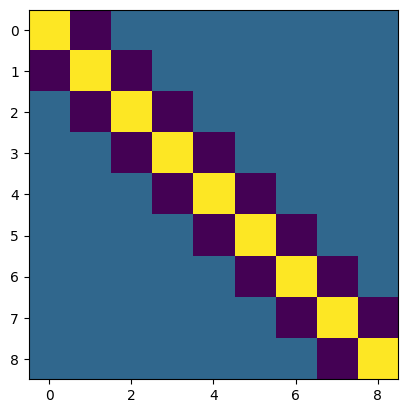

In [12]:
n = 9
h = 1./(n-1)

x=np.linspace(0,1,n)

a = -np.ones((n-1,))
b = 2*np.ones((n,))
A = (np.diag(a, -1) + np.diag(b, 0) + np.diag(a, +1))

A /= h**2

In [21]:
def PM(A, z0=None, tol=1e-5, nmax=500):
    """
    Power method for the computation of the largest eigenvalue of a matrix A
    """
    
    n,m = A.shape
    assert n == m, "Matrix must be square"
    
    if z0 is None:
        z = np.ones(n)

    # Normalise initial guess
    q = # complete
    it = 0
    err = tol + 1.
    errs = []
    while it < nmax and err > tol:
        z = # complete
        l = q.T@z 
        err = np.linalg.norm(z-l*q,2)
        q = # normalize
        
        it += 1
        errs.append(err)

    return l, q, it, errs

l_pow, x_pow, power_iter_count, errs_pow = PM(A)

print(f"Largest eigenvalue: {l_pow}, found in {power_iter_count} iterations")
print(f"Numpy largest eigenvalue: {np.linalg.eigvals(A).max()}")

Largest eigenvalue: 249.73523408577807, found in 82 iterations
Numpy largest eigenvalue: 249.73523408577964


## Inverse power method with shift
- Find the eigenvalue $\lambda$ **closest** to $\mu$
\begin{align*}
M & = A-\mu I\\
& \\
M\mathbf{x}_k &= \mathbf q_{k-1}\\
\mathbf{q}_k & = \frac{\mathbf{x}_k}{\|\mathbf{x}_k\|_2}\\
\mathbf{z}_k & = A\mathbf{q}_{k}\\
\lambda^k & = \mathbf{q}^T_k \mathbf{z}_k
\end{align*}


In [16]:
def IPM(A, z0=None, mu=0, tol=1e-5, nmax=500):
    """
    Inverse Power Method for the computation of the eigenvalue of a matrix A closest to mu
    """
    
    n,m = A.shape
    assert n == m, "Matrix must be square"

    # Initial guess
    if z0 is None:
        z0 = np.ones(n)

    # Normalize initial guess
    q = z0/np.linalg.norm(z0, 2)
    
    # Shifted matrix
    M = # complete here

    err = tol + 1.
    errs = []
    it = 0
    while it < nmax and err > tol:
        x = # complete
        q = x/np.linalg.norm(x, 2)
        z = A@q
        l = q.T@z

        err = np.linalg.norm(z-l*q,2)
        errs.append(err)
        it += 1

    return l, q, it, errs

In [28]:
l_inv_pow, x_inv_pow, inverse_power_iter_count, errs_inv_pow = IPM(A, mu=0)
print(f"Eigenvalue: {l_inv_pow}, found in {inverse_power_iter_count} iterations")

Eigenvalue: 6.264765914220837, found in 7 iterations


In [9]:
np.linalg.eigvals(A)

array([249.73523409, 231.55417528, 203.23651229, 167.55417528,
       128.        ,   6.26476591,  24.44582472,  88.44582472,
        52.76348771])

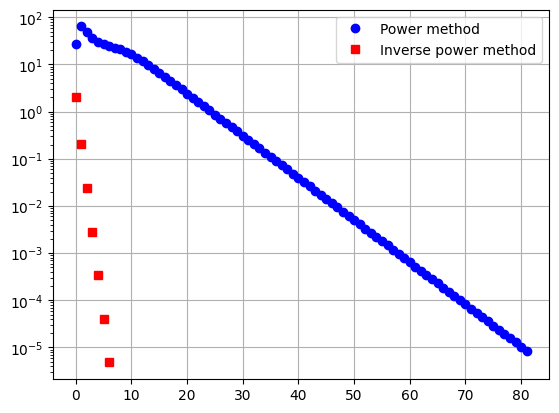

In [29]:
# plot convergence of power and inverse power methods
plt.semilogy(range(len(errs_pow)), errs_pow, "bo", label="Power method")
plt.semilogy(range(len(errs_inv_pow)), errs_inv_pow, "rs", label="Inverse power method")
plt.legend()
plt.grid()
plt.show()